In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import csv
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format



In [2]:
train_labels_12m = []
train_labels_1m = []
train_labels_3m = []
train_labels_6m = []
train_samples = []
data = open(r"C:\Users\cobyw\OneDrive\Documents\GitHub\ML-final-project\data\final_dataset_cleaned.csv")
reader = csv.reader(data)


for row in reader:
    if row[0] == "DATE":
        continue
    row = [eval(i) for i in row]
    train_samples.append(row[2:12])
    train_labels_1m.append(row[12])
    train_labels_3m.append(row[13])
    train_labels_6m.append(row[14])
    train_labels_12m.append(row[15])
train_labels_1m = np.asarray(train_labels_1m)
train_labels_3m = np.asarray(train_labels_3m)
train_labels_6m = np.asarray(train_labels_6m)
train_labels_12m = np.asarray(train_labels_12m)
train_samples = np.asarray(train_samples)
train_samples




array([[ 8.60000e+00,  5.41940e+03,  9.05650e+04, ...,  9.44000e+01,
        -1.91000e-02,  1.00000e+00],
       [ 8.90000e+00,  5.43940e+03,  9.05630e+04, ...,  9.47000e+01,
        -2.74000e-02,  1.00000e+00],
       [ 9.00000e+00,  5.43500e+03,  9.04340e+04, ...,  9.47000e+01,
         5.47000e-02,  1.00000e+00],
       ...,
       [ 3.80000e+00,  1.57109e+04,  1.56476e+05, ...,  3.06269e+02,
         1.31000e-02,  0.00000e+00],
       [ 3.80000e+00,  1.57415e+04,  1.56773e+05, ...,  3.07481e+02,
        -2.20000e-02,  0.00000e+00],
       [ 3.90000e+00,  1.57850e+04,  1.56923e+05, ...,  3.07619e+02,
         8.92000e-02,  0.00000e+00]])

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [161]:
unit_array = [6,6,3]
mode = "relu"
input = [Dense(units=unit_array[0], input_shape=(10,), activation = mode)]

for i in range(1, len(unit_array)):
    input.append(Dense(units=unit_array[i], activation = mode))
input.append(Dense(units=2, activation="softmax"))
model = Sequential(input)
"""model = Sequential([
    Dense(units=unit_array[0], input_shape=(10,), activation = mode),
    , Dense(unit = unit_arry[i], activation = mode) for i in range(1, len(unit_array))
    Dense(units=2, activation="softmax")
])"""
#Dense(units=unit_array[1], activation = mode)

'model = Sequential([\n    Dense(units=unit_array[0], input_shape=(10,), activation = mode),\n    , Dense(unit = unit_arry[i], activation = mode) for i in range(1, len(unit_array))\n    Dense(units=2, activation="softmax")\n])'

In [160]:
keras.backend.clear_session()

In [162]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [163]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"],run_eagerly=True)

Fitting the 12 month model:

In [164]:
fitted_model_12 = model.fit(x=scaled_train_samples, y=train_labels_12m, batch_size=3, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
168/168 - 4s - loss: 0.6862 - accuracy: 0.7032 - 4s/epoch - 27ms/step
Epoch 2/30
168/168 - 4s - loss: 0.6581 - accuracy: 0.9143 - 4s/epoch - 26ms/step
Epoch 3/30
168/168 - 4s - loss: 0.6278 - accuracy: 0.9143 - 4s/epoch - 25ms/step
Epoch 4/30
168/168 - 4s - loss: 0.5919 - accuracy: 0.9143 - 4s/epoch - 25ms/step
Epoch 5/30
168/168 - 4s - loss: 0.5500 - accuracy: 0.9143 - 4s/epoch - 24ms/step
Epoch 6/30
168/168 - 4s - loss: 0.5027 - accuracy: 0.9143 - 4s/epoch - 24ms/step
Epoch 7/30
168/168 - 4s - loss: 0.4552 - accuracy: 0.9143 - 4s/epoch - 24ms/step
Epoch 8/30
168/168 - 4s - loss: 0.4149 - accuracy: 0.9143 - 4s/epoch - 24ms/step
Epoch 9/30
168/168 - 4s - loss: 0.3834 - accuracy: 0.9143 - 4s/epoch - 24ms/step
Epoch 10/30
168/168 - 4s - loss: 0.3610 - accuracy: 0.9143 - 4s/epoch - 25ms/step
Epoch 11/30
168/168 - 4s - loss: 0.3458 - accuracy: 0.9143 - 4s/epoch - 24ms/step
Epoch 12/30
168/168 - 5s - loss: 0.3356 - accuracy: 0.9143 - 5s/epoch - 27ms/step
Epoch 13/30
168/168 - 4s 

Fitting the 1,3, and 6 month model

In [63]:
fitted_model_1 = model.fit(x=scaled_train_samples, y=train_labels_1m, batch_size=3, epochs=5, shuffle=True, verbose=1)
fitted_model_3 = model.fit(x=scaled_train_samples, y=train_labels_3m, batch_size=3, epochs=5, shuffle=True, verbose=1)
fitted_model_6 = model.fit(x=scaled_train_samples, y=train_labels_6m, batch_size=3, epochs=5, shuffle=True, verbose=1)

Epoch 1/5
168/168 [==============================] - 4s 22ms/step - loss: 0.3159 - accuracy: 0.8944
Epoch 2/5
168/168 [==============================] - 4s 23ms/step - loss: 0.3111 - accuracy: 0.8944
Epoch 3/5
168/168 [==============================] - 4s 22ms/step - loss: 0.3062 - accuracy: 0.8944
Epoch 4/5
168/168 [==============================] - 4s 21ms/step - loss: 0.3016 - accuracy: 0.8944
Epoch 5/5
168/168 [==============================] - 4s 21ms/step - loss: 0.2974 - accuracy: 0.8944
Epoch 1/5
168/168 [==============================] - 4s 22ms/step - loss: 0.2987 - accuracy: 0.8984
Epoch 2/5
168/168 [==============================] - 4s 21ms/step - loss: 0.2963 - accuracy: 0.8984
Epoch 3/5
168/168 [==============================] - 4s 22ms/step - loss: 0.2935 - accuracy: 0.8984
Epoch 4/5
168/168 [==============================] - 4s 22ms/step - loss: 0.2907 - accuracy: 0.8984
Epoch 5/5
168/168 [==============================] - 4s 21ms/step - loss: 0.2877 - accuracy: 0.8984


In [65]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy'])


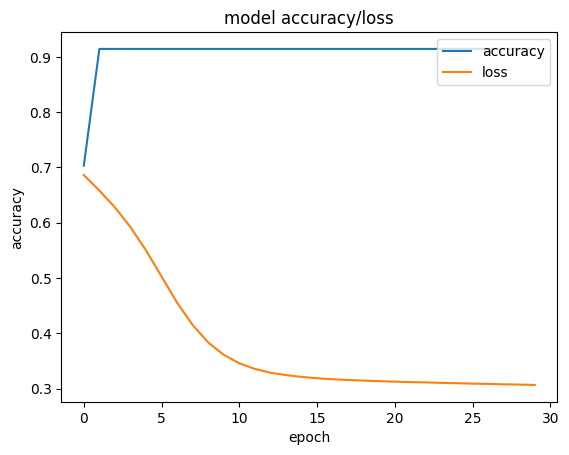

In [166]:
plt.plot(fitted_model_12.history['accuracy'])
plt.plot(fitted_model_12.history['loss'])
plt.title('model accuracy/loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')


In [54]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from tensorflow.estimator import DNNClassifier
from scikeras.wrappers import KerasClassifier

In [55]:
skf = StratifiedKFold(n_splits=20, random_state=42, shuffle=True)
estimator = KerasClassifier(build_fn=model, epochs=8, batch_size=2, verbose=0)
cv_scores = cross_val_score(estimator, train_samples, train_labels_12m,cv=skf,n_jobs=1, scoring="")
#print(cv_scores.mean())

InvalidParameterError: The 'scoring' parameter of check_scoring must be a str among {'roc_auc_ovo', 'positive_likelihood_ratio', 'precision_samples', 'neg_root_mean_squared_error', 'recall', 'accuracy', 'f1_weighted', 'r2', 'roc_auc', 'f1_samples', 'jaccard_micro', 'homogeneity_score', 'jaccard', 'recall_samples', 'precision_macro', 'max_error', 'balanced_accuracy', 'neg_mean_gamma_deviance', 'top_k_accuracy', 'f1', 'matthews_corrcoef', 'average_precision', 'rand_score', 'recall_macro', 'neg_negative_likelihood_ratio', 'mutual_info_score', 'adjusted_rand_score', 'f1_macro', 'neg_median_absolute_error', 'neg_mean_absolute_percentage_error', 'precision_micro', 'adjusted_mutual_info_score', 'neg_brier_score', 'roc_auc_ovr', 'jaccard_samples', 'jaccard_weighted', 'v_measure_score', 'roc_auc_ovr_weighted', 'explained_variance', 'recall_weighted', 'roc_auc_ovo_weighted', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'f1_micro', 'neg_mean_squared_log_error', 'neg_log_loss', 'recall_micro', 'precision_weighted', 'fowlkes_mallows_score', 'completeness_score', 'normalized_mutual_info_score', 'jaccard_macro', 'precision', 'neg_mean_absolute_error'}, a callable or None. Got '' instead.

In [61]:
cv_scores = cross_val_score(estimator, train_samples, train_labels_12m,cv=skf,n_jobs=1, scoring='roc_auc')
print(cv_scores)
print(cv_scores.mean())

INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpz1wple29\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpz1wple29\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp9z_k7d1c\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp9z_k7d1c\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp8ter9okz\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp8ter9okz\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpyeyky1bu\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpyeyky1bu\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpg3napw7n\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpg3napw7n\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpzebvre6l\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpzebvre6l\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpb945vjxw\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpb945vjxw\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpx5cc1v6h\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpx5cc1v6h\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpp9ss5aw7\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpp9ss5aw7\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp1i5i96d4\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp1i5i96d4\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpezu5gdb9\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpezu5gdb9\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpmyskdao7\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpmyskdao7\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpger7eeyj\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpger7eeyj\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpjbasx73i\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpjbasx73i\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpbu5ix_ti\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpbu5ix_ti\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpndlzipyh\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpndlzipyh\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmplcclsmyg\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmplcclsmyg\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpb74_k7ha\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmpb74_k7ha\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp98_j_b8_\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp98_j_b8_\assets
c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp054hglg0\assets


INFO:tensorflow:Assets written to: C:\Users\cobyw\AppData\Local\Temp\tmp054hglg0\assets


c:\Users\cobyw\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[0.5        0.47826087 0.5        0.5        0.65217391 0.32608696
 0.47826087 0.5        0.34782609 0.41304348 0.5        0.45652174
 0.43478261 0.47826087 0.5        0.5        0.5        0.5
 0.5        0.38636364]
0.47257905138339923
